In [377]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D

In [379]:
data = pd.read_csv("C:/Users/isubh/OneDrive/Desktop/temperatures.csv")
print (data)

     YEAR    JAN    FEB    MAR    APR    MAY    JUN    JUL    AUG    SEP  \
0    1901  22.40  24.14  29.07  31.91  33.41  33.18  31.21  30.39  30.47   
1    1902  24.93  26.58  29.77  31.78  33.73  32.91  30.92  30.73  29.80   
2    1903  23.44  25.03  27.83  31.39  32.91  33.00  31.34  29.98  29.85   
3    1904  22.50  24.73  28.21  32.02  32.64  32.07  30.36  30.09  30.04   
4    1905  22.00  22.83  26.68  30.01  33.32  33.25  31.44  30.68  30.12   
..    ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
112  2013  24.56  26.59  30.62  32.66  34.46  32.44  31.07  30.76  31.04   
113  2014  23.83  25.97  28.95  32.74  33.77  34.15  31.85  31.32  30.68   
114  2015  24.58  26.89  29.07  31.87  34.09  32.48  31.88  31.52  31.55   
115  2016  26.94  29.72  32.62  35.38  35.72  34.03  31.64  31.79  31.66   
116  2017  26.45  29.46  31.60  34.95  35.84  33.82  31.88  31.72  32.22   

       OCT    NOV    DEC  ANNUAL  JAN-FEB  MAR-MAY  JUN-SEP  OCT-DEC  
0    29.97  27.3

In [381]:
data.shape

(117, 18)

In [383]:
data.isnull().sum()

YEAR       0
JAN        0
FEB        0
MAR        0
APR        0
MAY        0
JUN        0
JUL        0
AUG        0
SEP        0
OCT        0
NOV        0
DEC        0
ANNUAL     0
JAN-FEB    0
MAR-MAY    0
JUN-SEP    0
OCT-DEC    0
dtype: int64

In [385]:
data.corr()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,JAN-FEB,MAR-MAY,JUN-SEP,OCT-DEC
YEAR,1.000000,0.575499,0.647066,0.553886,0.540662,0.407648,0.371840,0.478512,0.654138,0.664008,0.589073,0.697887,0.732222,0.801129,0.679869,0.640438,0.677061,0.749792
JAN,0.575499,1.000000,0.647017,0.457081,0.594674,0.365236,0.292855,0.339337,0.459944,0.499764,0.480695,0.526615,0.595902,0.749880,0.874226,0.575734,0.496515,0.607752
FEB,0.647066,0.647017,1.000000,0.589088,0.548803,0.377722,0.341302,0.418956,0.503188,0.472755,0.466916,0.519595,0.619320,0.792541,0.928731,0.635904,0.544527,0.609839
MAR,0.553886,0.457081,0.589088,1.000000,0.618621,0.387756,0.228349,0.232647,0.382344,0.370066,0.312226,0.498202,0.523316,0.689205,0.584612,0.848637,0.380640,0.505879
APR,0.540662,0.594674,0.548803,0.618621,1.000000,0.563317,0.299866,0.286052,0.490668,0.437970,0.473873,0.538037,0.579775,0.770596,0.643942,0.878402,0.474542,0.596943
MAY,0.407648,0.365236,0.377722,0.387756,0.563317,1.000000,0.274521,0.299072,0.473171,0.347289,0.468993,0.482822,0.444695,0.609015,0.403316,0.708221,0.431314,0.503445
JUN,0.371840,0.292855,0.341302,0.228349,0.299866,0.274521,1.000000,0.480925,0.504354,0.305761,0.380782,0.419968,0.366242,0.520189,0.351115,0.341301,0.749132,0.409325
JUL,0.478512,0.339337,0.418956,0.232647,0.286052,0.299072,0.480925,1.000000,0.622985,0.531865,0.568341,0.535413,0.440813,0.588454,0.423876,0.321388,0.799602,0.541023
AUG,0.654138,0.459944,0.503188,0.382344,0.490668,0.473171,0.504354,0.622985,1.000000,0.680212,0.661177,0.588961,0.595330,0.755384,0.534818,0.560118,0.866202,0.665040
SEP,0.664008,0.499764,0.472755,0.370066,0.437970,0.347289,0.305761,0.531865,0.680212,1.000000,0.680744,0.683866,0.629223,0.730756,0.529533,0.485397,0.778875,0.734650


In [387]:
monthly_columns = ['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']
monthly_data = data[monthly_columns]

In [389]:
# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Perform PCA on the extracted columns
pca = PCA(n_components=1)
pca_result = pca.fit_transform(data_scaled)

# Add the PCA component to the DataFrame
data['MONTHLY_PCA'] = pca_result[:, 0]

In [480]:
# Drop the months columns
data_for_corr = data.drop(columns=['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC'])

# Calculate the correlation matrix between PCA component and other columns
correlation_matrix = data_for_corr.drop(columns=['MONTHLY_PCA']).corrwith(data['MONTHLY_PCA']).abs()

# Sort the correlations in descending order
sorted_corr = correlation_matrix.sort_values(ascending=False)

# Get the highest and second highest correlated features using indexing
input_feature_1 = sorted_corr.index[1]

# Prepare the data for modeling with the highest correlated input feature
X_single = data[[input_feature_1]]
y = data['MONTHLY_PCA']


In [482]:
data.corr()["MONTHLY_PCA"].sort_values(ascending=False)

MONTHLY_PCA    1.000000
ANNUAL         0.993946
OCT-DEC        0.912456
DEC            0.851135
JUN-SEP        0.846090
NOV            0.841726
YEAR           0.827592
JAN-FEB        0.824321
MAR-MAY        0.822622
OCT            0.792597
AUG            0.787199
FEB            0.766902
SEP            0.763864
APR            0.740539
JAN            0.730112
MAR            0.655672
JUL            0.631510
MAY            0.604584
JUN            0.532280
Name: MONTHLY_PCA, dtype: float64

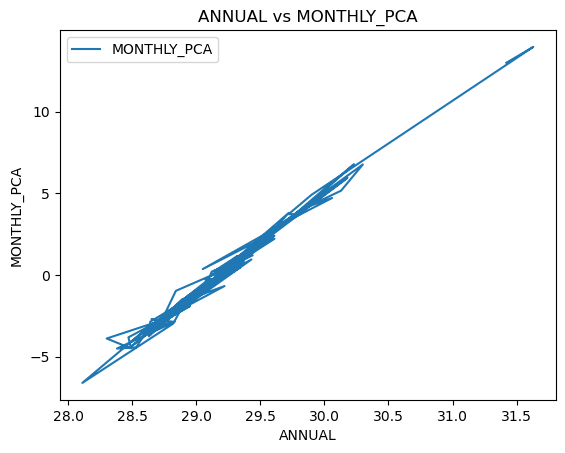

In [484]:
def plot(data, x_column, y_column):
    plt.plot(data[x_column], data[y_column], label=y_column)
    plt.xlabel(x_column)
    plt.ylabel(y_column)
    plt.title(f'{x_column} vs {y_column}')
    plt.legend()
    plt.show()

# Example usage
plot(data, 'ANNUAL', 'MONTHLY_PCA')

In [498]:
x = data[['ANNUAL']]
y = data[['MONTHLY_PCA']]

In [500]:
train_sse = []
test_sse = []

tr_size = 0.1

while tr_size <= 0.9:
    # Split the data into training and testing sets with varying training sizes
    x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=tr_size, random_state=1)
    
    # Fit the Linear Regression model
    mod = LinearRegression()
    mod.fit(x_train, y_train)
    
    # Predict on the training and testing sets
    pred_train = mod.predict(x_train)
    pred_test = mod.predict(x_test)
    
    # Calculate SSE for training and testing sets
    tr_sse = np.sum((pred_train - y_train)**2, axis=0)
    te_sse = np.sum((pred_test - y_test)**2, axis=0)
    
    # Append the results to the lists
    train_sse.append(tr_sse)
    test_sse.append(te_sse)
    
    # Increase the training size
    tr_size += 0.1


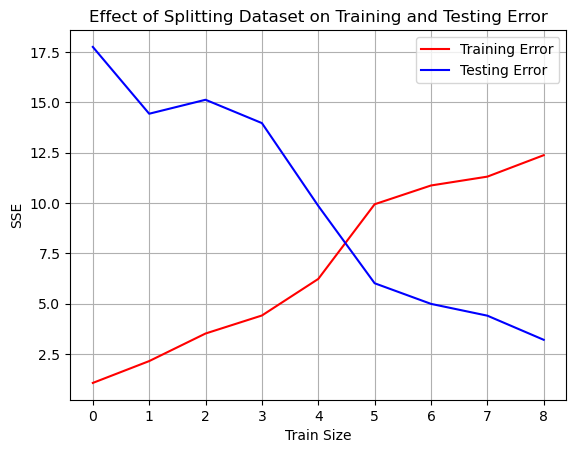

In [502]:
# Plot the SSE against the training size
plt.title("Effect of Splitting Dataset on Training and Testing Error")
plt.plot(np.array(train_sse), c='r')
plt.plot(np.array(test_sse), c='b')
plt.grid(True)
plt.xlabel("Train Size")
plt.ylabel("SSE")

plt.legend(["Training Error", "Testing Error"])
plt.show()

In [504]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

In [506]:
print("Highly correlated")
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

Highly correlated
(93, 1)
(24, 1)
(93, 1)
(24, 1)


In [508]:
# Fit the Linear Regression model
model_h = LinearRegression()
model_h.fit(x_train, y_train)

LinearRegression()

In [510]:
train_predicted = model_h.predict(x_train)
test_predicted = model_h.predict(x_test)

In [512]:
# Calculate Sum of Squared Errors (SSE) for the training set
train_sse = np.sum((train_predicted - y_train)**2, axis=0)
print("Training SSE:", train_sse)

Training SSE: MONTHLY_PCA    11.31211
dtype: float64


In [514]:
test_sse = np.sum((test_predicted - y_test)**2, axis = 0)
test_sse

MONTHLY_PCA    4.400126
dtype: float64

In [516]:
# Calculate Mean Absolute Error (MAE), Mean Squared Error (MSE), and R-squared (R²)
mae = round(mean_absolute_error(y_train, train_predicted), 2)
mse = round(mean_squared_error(y_train, train_predicted), 2)
r2 = round(r2_score(y_train, train_predicted), 2)

# Print the results
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R-squared (R²):", r2)

Mean Absolute Error (MAE): 0.27
Mean Squared Error (MSE): 0.12
R-squared (R²): 0.99


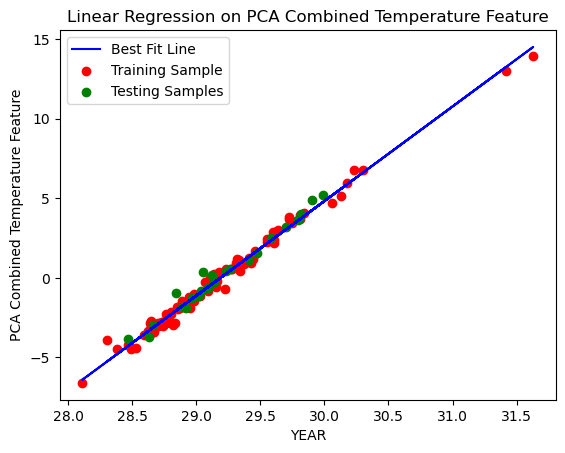

In [518]:
# Plot the results
plt.plot(x_train, train_predicted, c='b')
plt.scatter(x_train, y_train, c='r')
plt.scatter(x_test, y_test, c='g')
plt.legend(["Best Fit Line", "Training Sample", "Testing Samples"])
plt.xlabel("YEAR")
plt.ylabel("PCA Combined Temperature Feature")
plt.title("Linear Regression on PCA Combined Temperature Feature")
plt.show()

In [520]:
data.corr()["MONTHLY_PCA"].sort_values(ascending=False)

MONTHLY_PCA    1.000000
ANNUAL         0.993946
OCT-DEC        0.912456
DEC            0.851135
JUN-SEP        0.846090
NOV            0.841726
YEAR           0.827592
JAN-FEB        0.824321
MAR-MAY        0.822622
OCT            0.792597
AUG            0.787199
FEB            0.766902
SEP            0.763864
APR            0.740539
JAN            0.730112
MAR            0.655672
JUL            0.631510
MAY            0.604584
JUN            0.532280
Name: MONTHLY_PCA, dtype: float64

In [522]:
features = ['OCT-DEC', 'JUN-SEP', 'NOV']
X = data[features]
y = data['MONTHLY_PCA']

train_sse = []
test_sse = []

In [524]:
train_size=0.1
while train_size <= 0.9:
    # Splitting the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_size, random_state=1)
    
    # Training the model
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Calculating SSE
    train_sse.append(np.sum((y_train_pred - y_train) ** 2))
    test_sse.append(np.sum((y_test_pred - y_test) ** 2))
    
    # Increment the train size
    train_size += 0.1

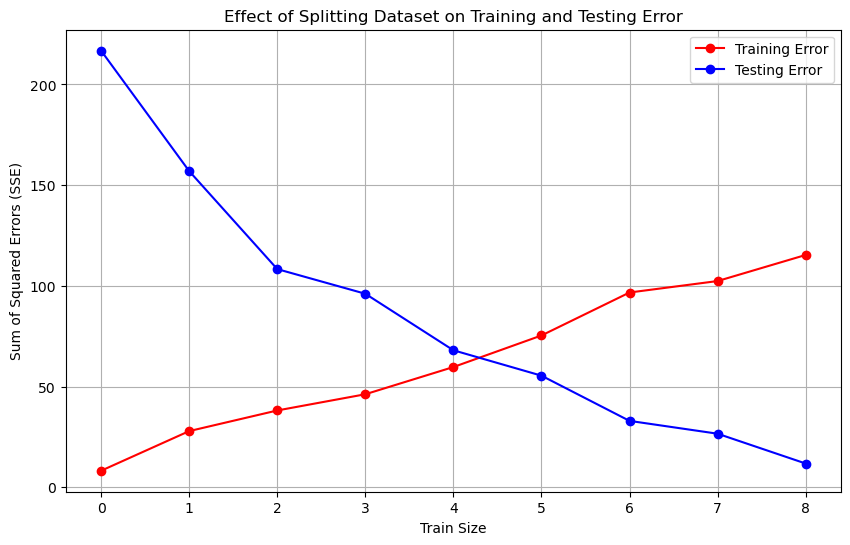

In [526]:
#train_sizes = [i / 10 for i in range(1, 10)]

# Plotting the SSE for training and testing
plt.figure(figsize=(10, 6))
plt.title("Effect of Splitting Dataset on Training and Testing Error")
plt.plot( train_sse, color='red', marker='o')
plt.plot( test_sse, color='blue', marker='o')
plt.grid(True)
plt.xlabel("Train Size")
plt.ylabel("Sum of Squared Errors (SSE)")
plt.legend(["Training Error", "Testing Error"])
plt.show()

In [528]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

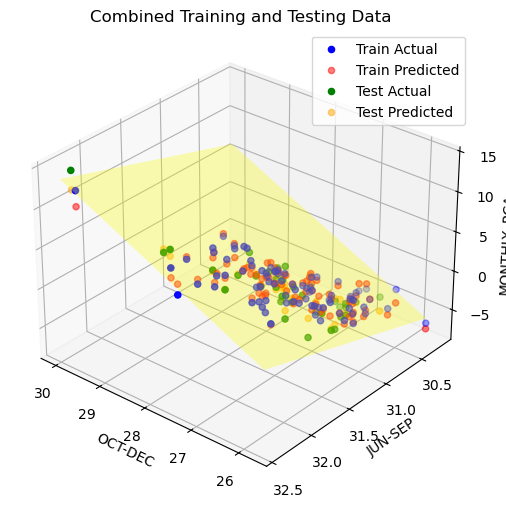

In [560]:
# Create a figure for 3D plotting
fig = plt.figure(figsize=(12, 6))

# Define the meshgrid for plotting the plane
xx, yy = np.meshgrid(np.linspace(min(X_train['OCT-DEC'].min(), X_test['OCT-DEC'].min()), 
                                 max(X_train['OCT-DEC'].max(), X_test['OCT-DEC'].max()), 50),
                     np.linspace(min(X_train['JUN-SEP'].min(), X_test['JUN-SEP'].min()), 
                                 max(X_train['JUN-SEP'].max(), X_test['JUN-SEP'].max()), 50))

# Calculate the corresponding z values for the plane using the model's coefficients
zz = model.intercept_ + model.coef_[0] * xx + model.coef_[1] * yy

# Combined plot for training and testing data
ax = fig.add_subplot(111, projection='3d')

# Training data
ax.scatter(X_train['OCT-DEC'], X_train['JUN-SEP'], y_train, color='blue', label='Train Actual')
ax.scatter(X_train['OCT-DEC'], X_train['JUN-SEP'], model.predict(X_train), color='red', label='Train Predicted', alpha=0.5)

# Testing data
ax.scatter(X_test['OCT-DEC'], X_test['JUN-SEP'], y_test, color='green', label='Test Actual')
ax.scatter(X_test['OCT-DEC'], X_test['JUN-SEP'], y_test_pred, color='orange', label='Test Predicted', alpha=0.5)

# Plotting the best-fit plane
ax.plot_surface(xx, yy, zz, color='yellow', alpha=0.3, rstride=100, cstride=100)

# Set labels and title with adjusted font size and position
ax.set_xlabel('OCT-DEC', labelpad=0.5)
ax.set_ylabel('JUN-SEP', labelpad=0.5)
ax.set_zlabel('MONTHLY_PCA', labelpad=0.7)
ax.set_title('Combined Training and Testing Data')

# Adjust the view angle for better visibility of the labels
ax.view_init(elev=30, azim=130)

# Add the legend
ax.legend()

# Show the plot
plt.show()
